<h1 align=center><font size = 5>Analiza i modelowanie smogu PM10 w Polsce</font></h1>

![Obrazek 1](img/smog2.jpg)

### Wstęp

Projekt ten przedstawia analizę przestrzennej zmienności smogu w Polsce, na przykładzie stężenia PM10 w µg/m$^3$. W pierwszej cześci projektu przeprowadzono analizę rozmieszczenia smogu biorąc po uwagę podstawowe kryteria czystego powietrza EU i WHO (średnie dobowe stężenie roczne oraz liczbę dni ze stężeniem powyżej 50 µg/m$^3$).W drugiej części zbudowano i przetestowano model predykcji średniego stężenia PM10 na dowolnym obszarze zabudowanym Polski w dowolnym czasie.Określono także wpływ rożnych czynników na jakość powietrza w ciągu roku oraz w sezonie zimowym i letnim. 

**Import potrzebnych w projekcie bibliotek**

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance

### Wprowadzenie danych

Dane *PM10_day2.csv* zawierają średnie dobowe wartości PM10 ze 129 stacji od stycznia 2016 roku do maja 2018 roku. Dane zostały wygenerowane ze zbioru danych zawierających wartości co godzinne.<br>
**Dane zawierają następujące atrybuty:**

| Atrybut | Opis  |
| :---: | :---: |
| Code | Kod stacji pomiarowej |
| Year | Rok |
| Month | Miesiąc |
| Day | Dzień |
| Concentration | Średnia dobowa koncentracja PM10 |
| Concentrat_min | Minimalna dobowa koncentracja PM10 |
| Concentrat_max | Maksymalna dobowa koncentracja PM10 |
| T |Średnia dobowa temperatura powietrza |
| Trange | Zakres temperatury w czasie doby |
| H% | Średnia wilgotność względna powietrza w % |
| Wind_vel | Średnia dobowa prędkość wiatru w ms$^{-1}$ |
| UR200 | Część (%) obszaru o promieniu 200m od punktu pomiarowego pokryta przez zabudowę miejską|
| WA200 | Część (%) obszaru o promieniu 200m od punktu pomiarowego pokryta przez wodę|
| GR200 | Część (%) obszaru o promieniu 200m od punktu pomiarowego pokryta przez zieleń|
| IN200 | Część (%) obszaru o promieniu 200m od punktu pomiarowego pokryta przez infrastrukturę przemysłową|
| RO200 | Część (%) obszaru o promieniu 200m od punktu pomiarowego pokryta przez drogi|
| UR600 | Część (%) obszaru o promieniu 600m od punktu pomiarowego pokryta przez zabudowę miejską|
| WA600 | Część (%) obszaru o promieniu 600m od punktu pomiarowego pokryta przez wodę|
| GR600 | Część (%) obszaru o promieniu 600m od punktu pomiarowego pokryta przez zieleń|
| IN600 | Część (%) obszaru o promieniu 600m od punktu pomiarowego pokryta przez infrastrukturę przemysłową|
| RO600 | Część (%) obszaru o promieniu 600m od punktu pomiarowego pokryta przez drogi|
| UR1000 | Część (%) obszaru o promieniu 1000m od punktu pomiarowego pokryta przez zabudowę miejską|
| WA1000 | Część (%) obszaru o promieniu 1000m od punktu pomiarowego pokryta przez wodę|
| GR1000 | Część (%) obszaru o promieniu 1000m od punktu pomiarowego pokryta przez zieleń|
| IN1000 | Część (%) obszaru o promieniu 1000m od punktu pomiarowego pokryta przez infrastrukturę przemysłową|
| RO1000 | Część (%) obszaru o promieniu 1000m od punktu pomiarowego pokryta przez drogi|
| UR2000 | Część (%) obszaru o promieniu 2000m od punktu pomiarowego pokryta przez zabudowę miejską|
| WA2000 | Część (%) obszaru o promieniu 2000m od punktu pomiarowego pokryta przez wodę|
| GR2000 | Część (%) obszaru o promieniu 2000m od punktu pomiarowego pokryta przez zieleń|
| IN2000 | Część (%) obszaru o promieniu 2000m od punktu pomiarowego pokryta przez infrastrukturę przemysłową|
| RO2000 | Część (%) obszaru o promieniu 2000m od punktu pomiarowego pokryta przez drogi|
| UR4000 | Część (%) obszaru o promieniu 4000m od punktu pomiarowego pokryta przez zabudowę miejską|
| WA4000 | Część (%) obszaru o promieniu 4000m od punktu pomiarowego pokryta przez wodę|
| GR4000 | Część (%) obszaru o promieniu 4000m od punktu pomiarowego pokryta przez zieleń|
| IN4000 | Część (%) obszaru o promieniu 4000m od punktu pomiarowego pokryta przez infrastrukturę przemysłową|
| RO4000 | Część (%) obszaru o promieniu 4000m od punktu pomiarowego pokryta przez drogi|
| CorIN2 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni zgodnego z kierunkiem wiatru na obszarze o promieniu 2 km|
| CorOUT2 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni przeciwnego do kierunku wiatru na obszarze o promieniu 2 km|
| CorIN6 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni zgodnego z kierunkiem wiatru na obszarze o promieniu 6 km|
| CorOUT6 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni przeciwnego do kierunku wiatru na obszarze o promieniu 6 km|
| CorIN10 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni zgodnego z kierunkiem wiatru na obszarze o promieniu 10 km|
| CorOUT10 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni przeciwnego do kierunku wiatru na obszarze o promieniu 10 km|
| CorIN15 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni zgodnego z kierunkiem wiatru na obszarze o promieniu 15 km|
| CorOUT15 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni przeciwnego do kierunku wiatru na obszarze o promieniu 15 km|
| CorIN30 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni zgodnego z kierunkiem wiatru na obszarze o promieniu 30 km|
| CorOUT30 | Cęść (0-1) dostępnego korytarza powietrznego w sektorze 45 stopni przeciwnego do kierunku wiatru na obszarze o promieniu 30 km|
| AHA200 | Liczba aut na hektar w promieniu 200m od punktu pomiarowego (całkowita liczba rejestracji GPS z Open Street data)|
| AHA600 | Liczba aut na hektar w promieniu 600m od punktu pomiarowego (całkowita liczba rejestracji GPS z Open Street data)|
| AHA2000 | Liczba aut na hektar w promieniu 2000m od punktu pomiarowego (całkowita liczba rejestracji GPS z Open Street data)|

In [2]:
smog=pd.read_csv('PM10_day2.csv')
smog.head()

,Code,Year,Month,Day,Concentration,Concentrat_min,Concentrat_max,T,Trange,H%,...,CorOUT6,CorIN10,CorOUT10,CorIN15,CorOUT15,CorIN30,CorOUT30,AHA200,AHA600,AHA2000
0,PL0496A,2015,12,31,38.20,38.20,38.20,-13.60,0.0,84.0,...,0.87,0.26,0.92,0.12,0.83,0.32,0.84,3.94,60.51,50.73
1,PL0496A,2016,12,31,46.44,39.88,61.60,-1.10,2.7,95.6,...,0.39,0.89,0.31,0.93,0.20,0.96,0.25,3.94,60.51,50.73
2,PL0496A,2016,12,1,27.14,9.60,81.10,0.46,2.8,91.4,...,0.46,0.74,0.46,0.75,0.34,0.82,0.37,3.94,60.51,50.73
3,PL0496A,2016,12,2,14.78,5.60,32.11,-0.76,3.9,91.0,...,0.54,0.74,0.46,0.66,0.41,0.64,0.55,3.94,60.51,50.73
4,PL0496A,2016,12,3,8.27,1.23,15.66,-0.78,2.5,83.1,...,0.55,0.91,0.28,0.81,0.13,0.83,0.33,3.94,60.51,50.73


**Podstawowe pytania**

Podstawowe standardy czystości powietrza w EU wynoszą:<br>
50 µg/m3     24 hours(mean) nie więcej niż 35 razy do roku  (WHO 3 dni)<br>
40 µg/m3      1 year (mean)   (WHO  bez szkody dla zdrowia 20 µg/m3)

Dla 2016, 2017 wyznaczyć dla poszczególnych stacji średnie roczne PM10.<br>
Dla 2016, 2017 wyznaczyć dla poszczególnych stacji liczbę dni z przekroczeniem dobowego limitu PM10.

**Jakie stacje mamy do dyspozycji?**

In [3]:
stacje_all=list(smog['Code'].unique())
print(stacje_all)

['PL0496A', 'PL0151A', 'PL0651A', 'PL0234A', 'PL0236A', 'PL0294A', 'PL0568A', 'PL0241A', 'PL0243A', 'PL0526A', 'PL0184A', 'PL0295A', 'PL0311A', 'PL0559A', 'PL0051A', 'PL0052A', 'PL0049A', 'PL0047A', 'PL0520A', 'PL0045A', 'PL0048A', 'PL0050A', 'PL0046A', 'PL0209A', 'PL0575A', 'PL0585A', 'PL0634A', 'PL0503A', 'PL0031A', 'PL0008A', 'PL0222A', 'PL0306A', 'PL0237A', 'PL0218A', 'PL0242A', 'PL0529A', 'PL0239A', 'PL0552A', 'PL0238A', 'PL0240A', 'PL0283A', 'PL0596A', 'PL0563A', 'PL0187A', 'PL0192A', 'PL0321A', 'PL0191A', 'PL0504A', 'PL0633A', 'PL0298A', 'PL0039A', 'PL0643A', 'PL0012A', 'PL0501A', 'PL0641A', 'PL0273A', 'PL0642A', 'PL0669A', 'PL0670A', 'PL0509A', 'PL0115A', 'PL0635A', 'PL0094A', 'PL0144A', 'PL0589A', 'PL0104A', 'PL0096A', 'PL0543A', 'PL0544A', 'PL0138A', 'PL0507A', 'PL0550A', 'PL0502A', 'PL0126A', 'PL0647A', 'PL0671A', 'PL0175A', 'PL0296A', 'PL0176A', 'PL0682A', 'PL0553A', 'PL0221A', 'PL0674A', 'PL0468A', 'PL0136A', 'PL0205A', 'PL0605A', 'PL0573A', 'PL0244A', 'PL0245A', 'PL0276A'

**Charakterystyczną cechą jest zmienność sezonowa.**

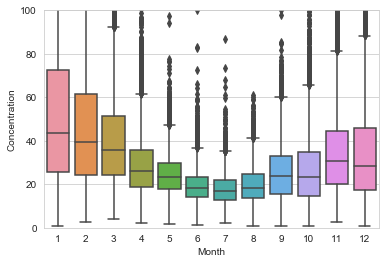

In [4]:
# Analiza po miesiącach
plt.ylim((0,100))
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data=smog, x='Month', y='Concentration');

**Zmienność pomiedzy stacjami.
Zmienność średniej rocznej.**

In [7]:
# Średnie roczne zanieczyszczenie dla stacji (wykonać oddzielnie dla 2016 i 2017)
sr_roczna2016=np.zeros((len(stacje_all),2))
#sr_roczna2017=np.zeros((len(stacje_all),2))
rok=int(2016)
for i in range(0,len(stacje_all)):
    smog1=smog[(smog.Code==stacje_all[i]) & (smog.Year==rok)]
    if len(smog1)>200:   # co najmniej 200 dni
        pp=smog['Concentration'][(smog.Code==stacje_all[i]) & (smog.Year==rok)].mean()
        pps=smog['Concentration'][(smog.Code==stacje_all[i]) & (smog.Year==rok)].std()
        if rok==2016:
            sr_roczna2016[i,0]=round(pp,2)
            sr_roczna2016[i,1]=round(pps,2)
        elif rok==2017:
            sr_roczna2017[i,0]=round(pp,2)
            sr_roczna2017[i,1]=round(pps,2)            

In [8]:
out_plik = open(r"C:\POLUTION\PROJ\sr_roczne2.txt","w")

sss='STACJA,SR2016,SR2017,OD2016,OD2017'+"\n"
out_plik.write(sss)
for i in range (len(stacje_all)):
    sss=stacje_all[i]+','+str(sr_roczna2016[i,0])+','+str(sr_roczna2017[i,0])+','\
    +str(sr_roczna2016[i,1])+','+str(sr_roczna2017[i,1])+'\n'
    out_plik.write(sss)
    
out_plik.close()    

In [9]:
pm10sr=pd.read_csv('sr_roczne2.txt')
pm10sr.loc[pm10sr['SR2017']==0,'SR2017']=np.nan
pm10sr.loc[pm10sr['SR2016']==0,'SR2016']=np.nan
pm10sr.loc[pm10sr['OD2017']==0,'OD2017']=np.nan
pm10sr.loc[pm10sr['OD2016']==0,'OD2016']=np.nan

**Wczytaj SHP powiatów i stacji pomiarowych**

In [10]:
powiatypl=gpd.read_file('geo/pl_powiaty.shp')
pm10=gpd.read_file('geo/stacje_PM10.shp')

In [11]:
pm10.head(2)

,AirQuality,AirQuali_1,AirQuali_2,AirPolluta,Altitude,count,mean,STACJA_MET,IDPP,geometry
0,SlKatoKossut,PL0008A,urban,PM10,273.0,20654.0,41.369689,Katowice,1,POINT (498220.7060315014 266381.2517729597)
1,MpKrakAlKras,PL0012A,urban,PM10,207.0,20567.0,57.291317,KrakÃ³w,2,POINT (566277.409905806 243790.1838724455)


In [12]:
# dołączenie pól pm10sr do pm10
pm10B=pm10.set_index('AirQuali_1').join(pm10sr.set_index('STACJA'))
pm10B.head(2)

,AirQuality,AirQuali_2,AirPolluta,Altitude,count,mean,STACJA_MET,IDPP,geometry,SR2016,SR2017,OD2016,OD2017
AirQuali_1,,,,,,,,,,,,,
PL0008A,SlKatoKossut,urban,PM10,273.0,20654.0,41.369689,Katowice,1,POINT (498220.7060315014 266381.2517729597),38.64,41.01,25.47,42.92
PL0012A,MpKrakAlKras,urban,PM10,207.0,20567.0,57.291317,KrakÃ³w,2,POINT (566277.409905806 243790.1838724455),56.58,54.67,34.44,48.44


Mapa wartości średnich w 2017.

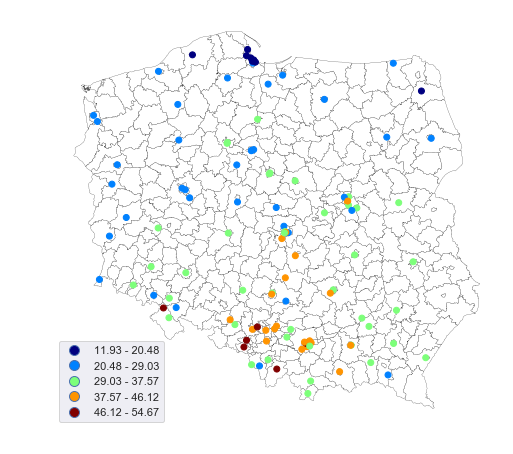

In [15]:
plt.rcParams['figure.figsize'] = [8,8]

ax = powiatypl.plot(color='white', edgecolor='black',linewidth=0.2);
pm10B[pm10B.SR2017>0].plot(column='SR2017',cmap='jet', scheme='equal_interval',
                           ax=ax,legend='True');
ax.axis('off');

**Liczba dni w roku z PM10 > 50 µg/m3**

In [16]:
out_plik = open(r"C:\POLUTION\PROJ\dobowe_dni50a.txt","w")
sss='STACJA,DNI17_50'+"\n"
out_plik.write(sss)
  
prog=50
rok=2017
for i in range(0,len(stacje_all)):
    smog1=smog[(smog.Code==stacje_all[i]) & (smog.Year==rok)]
    #print(stacje_all[i],len(smog1['Concentration'][smog1['Concentration']>50]),len(smog1))
    if len(smog1)>=200:
        ldni=len(smog1['Concentration'][smog1['Concentration']>50])
        sss=stacje_all[i]+','+str(ldni)+'\n'
        out_plik.write(sss)
    
out_plik.close()      

In [17]:
pm10d50=pd.read_csv('dobowe_dni50a.txt')

In [18]:
pm10['STACJA']=pm10.AirQuali_1

pm10C=pd.merge(pm10,pm10d50,how='outer',on='STACJA')

pm10C.head(2)

,AirQuality,AirQuali_1,AirQuali_2,AirPolluta,Altitude,count,mean,STACJA_MET,IDPP,geometry,STACJA,DNI17_50
0,SlKatoKossut,PL0008A,urban,PM10,273.0,20654.0,41.369689,Katowice,1,POINT (498220.7060315014 266381.2517729597),PL0008A,78.0
1,MpKrakAlKras,PL0012A,urban,PM10,207.0,20567.0,57.291317,KrakÃ³w,2,POINT (566277.409905806 243790.1838724455),PL0012A,126.0


Mapa liczby dni z PM10 > 50 w 2017.

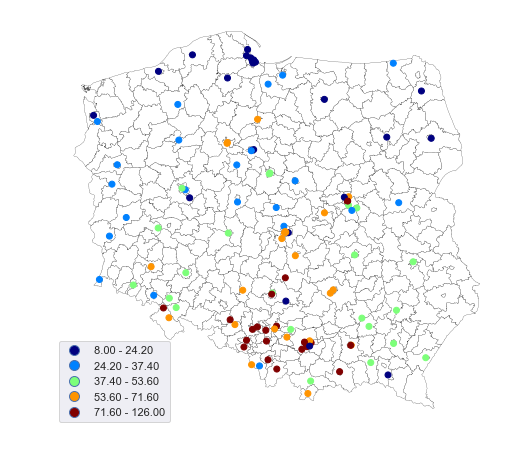

In [17]:
plt.rcParams['figure.figsize'] = [8,8]

ax = powiatypl.plot(color='white', edgecolor='black',linewidth=0.2);
pm10C[pm10C.DNI17_50>0].plot(column='DNI17_50',cmap='jet', scheme='quantiles',
                             ax=ax,legend='True');
ax.axis('off');

### Modelowanie

In [20]:
smoga=smog.dropna()

In [21]:
collist=['Concentration', 'T', 'H%',  'Wind_vel',
       'UR200', 'WA200', 'GR200', 'IN200', 'RO200', 'UR600', 'WA600', 'GR600',
       'IN600', 'RO600', 'UR1000', 'WA1000', 'GR1000', 'IN1000', 'RO1000',
       'UR2000', 'WA2000', 'GR2000', 'IN2000', 'RO2000', 'UR4000', 'WA4000',
       'GR4000', 'IN4000', 'RO4000', 'CorIN2', 'CorOUT2', 'CorIN6', 'CorOUT6',
       'CorIN10', 'CorOUT10', 'CorIN15', 'CorOUT15', 'CorIN30', 'CorOUT30',
       'AHA200', 'AHA600', 'AHA2000']
smog1=smoga[collist]

Współczynnik korelacji z koncentracją (wybór istotnych atrybutów)

In [22]:
correlations_data = smog1.corr()['Concentration'].sort_values()
print(correlations_data, '\n')

T               -0.432010
Wind_vel        -0.298404
WA4000          -0.090318
GR200           -0.080640
GR4000          -0.078984
GR600           -0.074964
GR2000          -0.070282
WA2000          -0.068625
GR1000          -0.056862
CorIN30         -0.054164
CorOUT15        -0.052938
CorOUT30        -0.052701
CorOUT10        -0.047380
WA1000          -0.043431
CorOUT6         -0.029673
CorIN15         -0.017899
WA600           -0.013054
AHA200          -0.008246
CorIN10         -0.007999
WA200           -0.003294
CorOUT2          0.000539
IN200            0.005842
CorIN6           0.011241
AHA600           0.031865
CorIN2           0.034555
UR600            0.041051
IN2000           0.042788
UR1000           0.047239
IN1000           0.048300
UR200            0.051281
IN600            0.055101
RO1000           0.056491
RO600            0.065885
IN4000           0.082824
UR2000           0.092711
RO200            0.096458
RO2000           0.098587
RO4000           0.106903
H%          

In [23]:
collist2=['Concentration', 'T', 'H%',  'Wind_vel', 'UR4000', 'WA4000',
       'GR200', 'IN4000', 'RO4000','CorIN30', 'CorOUT15','AHA2000']
smog2=smoga[collist2]

In [24]:
smog2.shape

(68162, 12)

Podział na data frame X i y

In [36]:
X=smog2[['T', 'H%',  'Wind_vel', 'RO4000', 'UR4000', 'WA4000',
       'GR200', 'IN4000', 'CorOUT15', 'CorIN30', 'AHA2000']]
y=smog2[['Concentration']]

In [64]:
# rozwiązanie alternatywne
X=smog2[['T', 'H%',  'Wind_vel']]
y=smog2[['Concentration']]

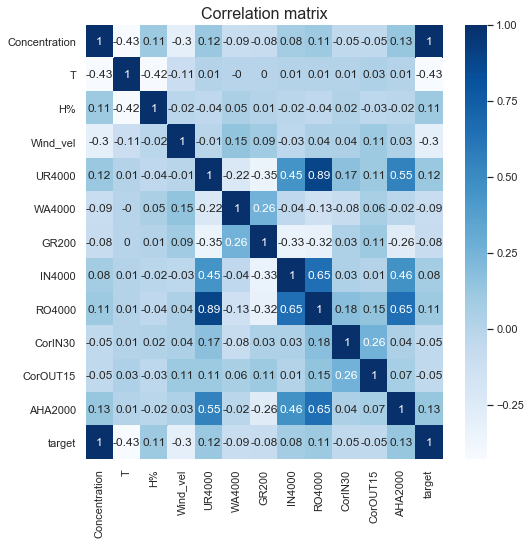

In [27]:
plt.subplots(figsize=(8,8))
sns.heatmap(smog2.assign(target = y).corr().round(2), cmap = 'Blues', 
            annot = True).set_title('Correlation matrix', fontsize = 16);

Zbiór treningowy i testowy


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.15, random_state=107)

In [29]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

Random forest

In [66]:
y_traina=np.array(y_train).reshape(-1)
y_testa=np.array(y_test).reshape(-1)
random_forest = RandomForestRegressor(random_state=70,n_estimators=100,oob_score = True)
random_forest.fit(X_train,y_traina)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=70, verbose=0, warm_start=False)

In [31]:
predictions = random_forest.predict(X_test)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_testa, predictions))
print('MSE:', metrics.mean_squared_error(y_testa, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testa, predictions)))
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(random_forest.score(X_train, y_train), 
                                                                                    random_forest.oob_score_,
                                                                                    random_forest.score(X_test, y_test)))

MAE: 9.431809936769259
MSE: 218.9984449584984
RMSE: 14.798596046872095
R^2 Training Score: 0.90 
OOB Score: 0.67 
R^2 Validation Score: 0.70


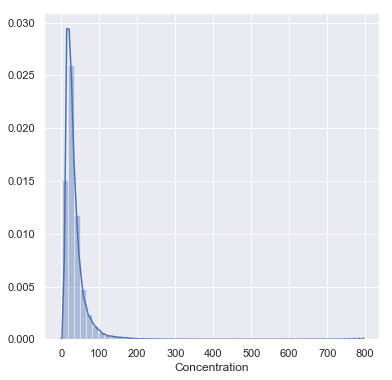

In [33]:
plt.subplots(figsize=(6,6))
sns.distplot(smog2['Concentration']);

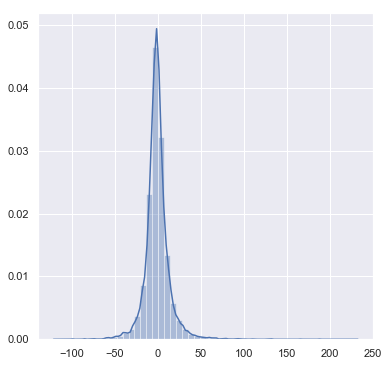

In [34]:
plt.subplots(figsize=(6,6))
sns.distplot((y_testa-predictions),bins=50);

Ocena istotnych czynników.

In [39]:
# jakie czynniki były ważne
base_imp = imp_df(X_train.columns, random_forest.feature_importances_)
base_imp

,feature,feature_importance
0,T,0.365589
1,Wind_vel,0.239918
2,H%,0.097146
3,CorOUT15,0.054592
4,CorIN30,0.053839
5,AHA2000,0.041743
6,WA4000,0.036581
7,GR200,0.030780
8,UR4000,0.027706
9,RO4000,0.026478


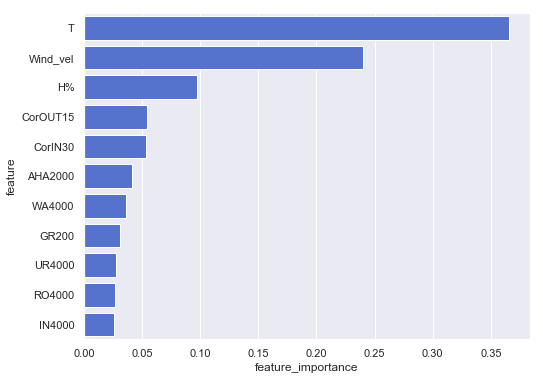

In [40]:
plt.subplots(figsize=(8,6))
var_imp_plot(base_imp, '');

In [41]:
# jakie czynniki były ważne

perm = PermutationImportance(random_forest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.9247 ± 0.0357,T
0.5710 ± 0.0261,Wind_vel
0.1653 ± 0.0126,H%
0.0547 ± 0.0017,AHA2000
0.0494 ± 0.0216,WA4000
0.0460 ± 0.0022,UR4000
0.0265 ± 0.0033,RO4000
0.0265 ± 0.0074,GR200
0.0262 ± 0.0058,CorOUT15
0.0261 ± 0.0022,CorIN30


Random forest (styczeń-marzec)

In [42]:
smog3zima=smoga[(smoga['Month']==1) | (smoga['Month']==2) | (smoga['Month']==3)]

In [43]:
smog1z=smog3zima[collist2]

In [44]:
smog1z.shape

(20928, 12)

In [45]:
correlations_data = smog1z.corr()['Concentration'].sort_values()
print(correlations_data, '\n')

Wind_vel        -0.450891
T               -0.376029
WA4000          -0.096270
GR200           -0.082330
CorOUT15        -0.063619
CorIN30         -0.050574
H%               0.036084
IN4000           0.082551
RO4000           0.098566
UR4000           0.122030
AHA2000          0.124822
Concentration    1.000000
Name: Concentration, dtype: float64 



In [46]:
X=smog1z[['T', 'H%',  'Wind_vel', 'RO4000', 'UR4000', 'WA4000',
       'GR200', 'IN4000', 'CorOUT15', 'CorIN30', 'AHA2000']]
y=smog1z[['Concentration']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.15, random_state=107)

In [47]:
y_traina=np.array(y_train).reshape(-1)
y_testa=np.array(y_test).reshape(-1)
random_forest = RandomForestRegressor(random_state=60,n_estimators=100,oob_score = True)
random_forest.fit(X_train,y_traina)
predictions = random_forest.predict(X_test)

In [48]:
print('MAE:', metrics.mean_absolute_error(y_testa, predictions))
print('MSE:', metrics.mean_squared_error(y_testa, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testa, predictions)))
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(random_forest.score(X_train, y_train), 
                                                                                    random_forest.oob_score_,
                                                                                    random_forest.score(X_test, y_test)))

MAE: 9.954705182722085
MSE: 234.42551269435427
RMSE: 15.31096054120558
R^2 Training Score: 0.95 
OOB Score: 0.66 
R^2 Validation Score: 0.68


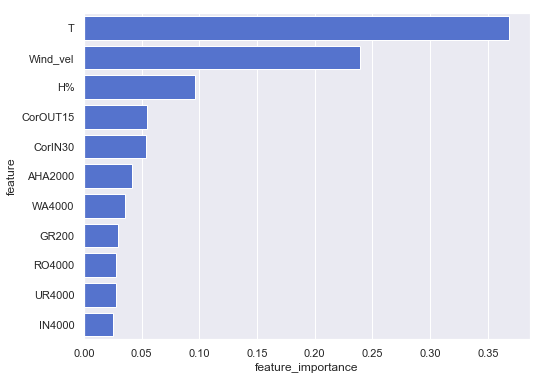

In [49]:
# jakie czynniki były ważne
base_imp = imp_df(X_train.columns, random_forest.feature_importances_)
plt.subplots(figsize=(8,6))
var_imp_plot(base_imp, '');

In [50]:
perm = PermutationImportance(random_forest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.9279 ± 0.0366,T
0.5652 ± 0.0278,Wind_vel
0.1689 ± 0.0183,H%
0.0519 ± 0.0013,AHA2000
0.0488 ± 0.0190,WA4000
0.0457 ± 0.0031,UR4000
0.0287 ± 0.0026,CorIN30
0.0276 ± 0.0052,RO4000
0.0265 ± 0.0084,GR200
0.0249 ± 0.0036,CorOUT15


Random forest (czerwiec - lipiec)

In [51]:
smog3lato=smoga[(smoga['Month']==6) | (smoga['Month']==7) | (smoga['Month']==8)]

In [52]:
smog1L=smog3lato[collist2]

In [53]:
correlations_data = smog1L.corr()['Concentration'].sort_values()
print(correlations_data, '\n')

H%              -0.239511
Wind_vel        -0.238453
GR200           -0.154781
WA4000          -0.129651
CorIN30         -0.030092
CorOUT15        -0.000392
IN4000           0.188795
RO4000           0.261888
UR4000           0.263965
AHA2000          0.322686
T                0.477887
Concentration    1.000000
Name: Concentration, dtype: float64 



In [54]:
X=smog1L[['T', 'H%',  'Wind_vel', 'RO4000', 'UR4000', 'WA4000',
       'GR200', 'IN4000', 'CorOUT15', 'CorIN30', 'AHA2000']]
y=smog1L[['Concentration']]

In [ ]:
# rozwiązanie alternatywne
X=smog2[['T', 'H%',  'Wind_vel']]
y=smog2[['Concentration']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.15, random_state=107)


In [56]:
y_traina=np.array(y_train).reshape(-1)
y_testa=np.array(y_test).reshape(-1)
random_forest = RandomForestRegressor(random_state=60,n_estimators=100,oob_score = True)
random_forest.fit(X_train,y_traina)
predictions = random_forest.predict(X_test)

In [57]:
  print('MAE:', metrics.mean_absolute_error(y_testa, predictions))
print('MSE:', metrics.mean_squared_error(y_testa, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testa, predictions)))
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(random_forest.score(X_train, y_train), 
                                                                                    random_forest.oob_score_,
                                                                                    random_forest.score(X_test, y_test)))

MAE: 3.8678820056232426
MSE: 26.390789977844424
RMSE: 5.137196704219571
R^2 Training Score: 0.94 
OOB Score: 0.55 
R^2 Validation Score: 0.53


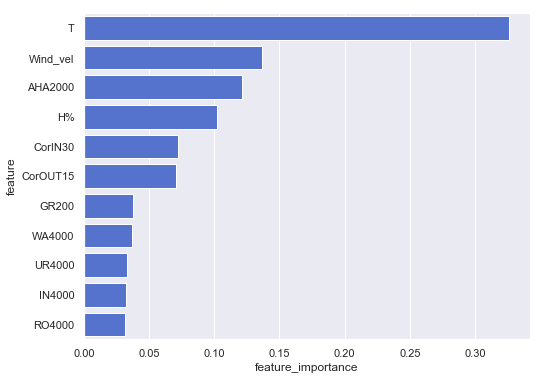

In [58]:
# jakie czynniki były ważne
base_imp = imp_df(X_train.columns, random_forest.feature_importances_)
plt.subplots(figsize=(8,6))
var_imp_plot(base_imp, '');

In [59]:
perm = PermutationImportance(random_forest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4847 ± 0.0419,T
0.2059 ± 0.0295,Wind_vel
0.1841 ± 0.0119,AHA2000
0.0662 ± 0.0054,H%
0.0378 ± 0.0073,WA4000
0.0303 ± 0.0062,GR200
0.0283 ± 0.0061,CorOUT15
0.0281 ± 0.0082,CorIN30
0.0275 ± 0.0067,UR4000
0.0271 ± 0.0038,RO4000


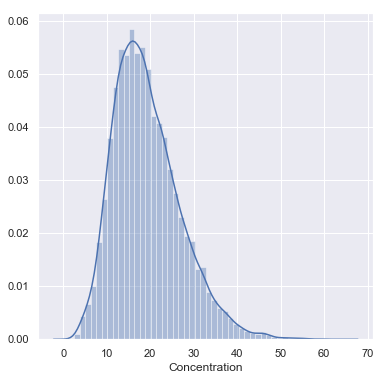

In [60]:
plt.subplots(figsize=(6,6))
sns.distplot(smog1L['Concentration']);

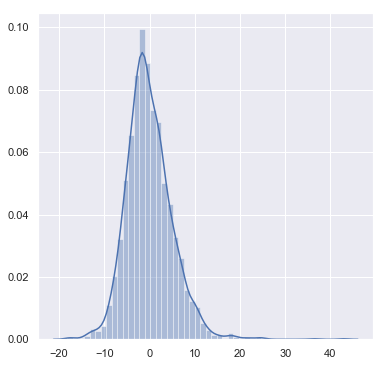

In [61]:
plt.subplots(figsize=(6,6))
sns.distplot((y_testa-predictions),bins=50);

**Prognoza na 2017 na podstawie 'T', 'H%',  'Wind_vel'**

In [62]:
XX=smog[['T', 'H%',  'Wind_vel']]

In [67]:
predictions = random_forest.predict(XX)

In [68]:
len(predictions)

96680

In [79]:
smogpred=pd.DataFrame(predictions,columns=['PRED'])

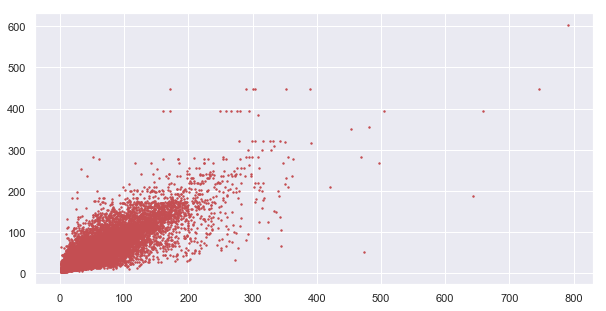

In [80]:
# Prawdziwe versus przewidywane

fig, ax = plt.subplots(figsize=(10, 5))  
ax.scatter(smog.Concentration,predictions,label='skitscat',color='r',marker='o',s=2);

In [81]:
smogp=pd.concat([smog,smogpred],axis=1)

In [82]:
smogp.head(5)

,Code,Year,Month,Day,Concentration,Concentrat_min,Concentrat_max,T,Trange,H%,...,CorIN10,CorOUT10,CorIN15,CorOUT15,CorIN30,CorOUT30,AHA200,AHA600,AHA2000,PRED
0,PL0496A,2015,12,31,38.20,38.20,38.20,-13.60,0.0,84.0,...,0.26,0.92,0.12,0.83,0.32,0.84,3.94,60.51,50.73,56.683967
1,PL0496A,2016,12,31,46.44,39.88,61.60,-1.10,2.7,95.6,...,0.89,0.31,0.93,0.20,0.96,0.25,3.94,60.51,50.73,43.974972
2,PL0496A,2016,12,1,27.14,9.60,81.10,0.46,2.8,91.4,...,0.74,0.46,0.75,0.34,0.82,0.37,3.94,60.51,50.73,29.912747
3,PL0496A,2016,12,2,14.78,5.60,32.11,-0.76,3.9,91.0,...,0.74,0.46,0.66,0.41,0.64,0.55,3.94,60.51,50.73,25.669911
4,PL0496A,2016,12,3,8.27,1.23,15.66,-0.78,2.5,83.1,...,0.91,0.28,0.81,0.13,0.83,0.33,3.94,60.51,50.73,18.908575


In [83]:
smogp['Roznica']=smogp['Concentration']-smogp['PRED']

In [84]:
smogp.head()

,Code,Year,Month,Day,Concentration,Concentrat_min,Concentrat_max,T,Trange,H%,...,CorOUT10,CorIN15,CorOUT15,CorIN30,CorOUT30,AHA200,AHA600,AHA2000,PRED,Roznica
0,PL0496A,2015,12,31,38.20,38.20,38.20,-13.60,0.0,84.0,...,0.92,0.12,0.83,0.32,0.84,3.94,60.51,50.73,56.683967,-18.483967
1,PL0496A,2016,12,31,46.44,39.88,61.60,-1.10,2.7,95.6,...,0.31,0.93,0.20,0.96,0.25,3.94,60.51,50.73,43.974972,2.465028
2,PL0496A,2016,12,1,27.14,9.60,81.10,0.46,2.8,91.4,...,0.46,0.75,0.34,0.82,0.37,3.94,60.51,50.73,29.912747,-2.772747
3,PL0496A,2016,12,2,14.78,5.60,32.11,-0.76,3.9,91.0,...,0.46,0.66,0.41,0.64,0.55,3.94,60.51,50.73,25.669911,-10.889911
4,PL0496A,2016,12,3,8.27,1.23,15.66,-0.78,2.5,83.1,...,0.28,0.81,0.13,0.83,0.33,3.94,60.51,50.73,18.908575,-10.638575


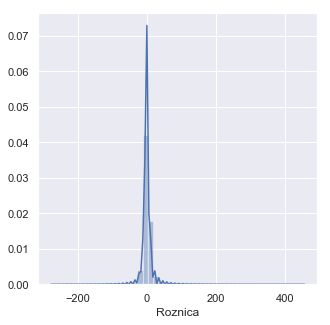

In [85]:
plt.subplots(figsize=(5,5))
sns.distplot(smogp['Roznica']);

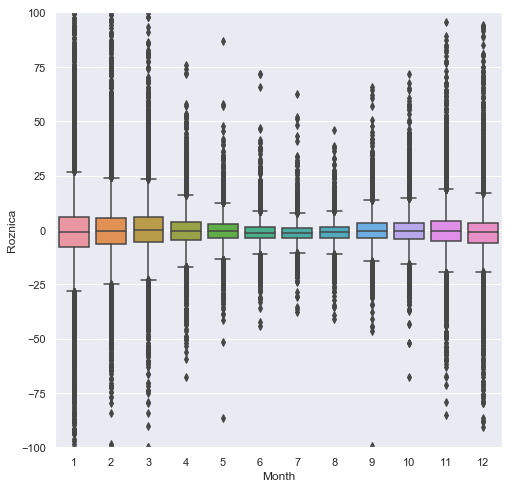

In [86]:
# Analiza po miesiącach
plt.ylim((-100,100))
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(data=smogp, x='Month', y='Roznica');

In [87]:
correlations_data = smogp.corr()['Roznica'].sort_values()
print(correlations_data, '\n')

GR4000           -0.155980
GR2000           -0.138263
GR1000           -0.104877
GR600            -0.095106
GR200            -0.073936
CorOUT15         -0.050375
CorOUT10         -0.046481
CorOUT6          -0.039976
PRED             -0.037979
CorIN30          -0.034647
CorOUT2          -0.028459
CorIN15          -0.027895
Month            -0.025002
CorIN10          -0.023379
AHA200           -0.022477
CorIN6           -0.021183
CorOUT30         -0.020699
CorIN2           -0.019413
Day              -0.001937
H%               -0.001681
T                 0.000854
WA200             0.006667
WA1000            0.009366
UR600             0.010568
Year              0.011478
WA2000            0.011786
UR200             0.016305
Trange            0.017050
WA4000            0.017196
AHA600            0.021813
WA600             0.028820
Wind_vel          0.039119
IN200             0.046798
UR1000            0.054343
RO600             0.060571
IN2000            0.080655
RO1000            0.083778
I

In [90]:
# Średnia roczna różnica dla stacji
rr_roczna2016=np.zeros((len(stacje_all),2))
#rr_roczna2017=np.zeros((len(stacje_all),2))
rok=int(2016)
for i in range(0,len(stacje_all)):
    smog1=smogp[(smogp.Code==stacje_all[i]) & (smogp.Year==rok)]
    if len(smog1)>200:   # co najmniej 200 dni
        pp=smogp['Roznica'][(smogp.Code==stacje_all[i]) & (smogp.Year==rok)].mean()
        pps=smogp['Roznica'][(smogp.Code==stacje_all[i]) & (smogp.Year==rok)].std()
        if rok==2016:
            rr_roczna2016[i,0]=round(pp,2)
            rr_roczna2016[i,1]=round(pps,2)
        elif rok==2017:
            rr_roczna2017[i,0]=round(pp,2)
            rr_roczna2017[i,1]=round(pps,2)   

In [91]:
out_plik = open(r"C:\POLUTION\PROJ\rr_roczne2.txt","w")

sss='STACJA,SR2016,SR2017,OD2016,OD2017'+"\n"
out_plik.write(sss)
for i in range (len(stacje_all)):
    #print(stacje_all[i],sr_roczna2016[i],sr_roczna2017[i])
    sss=stacje_all[i]+','+str(rr_roczna2016[i,0])+','+str(rr_roczna2017[i,0])+','\
    +str(rr_roczna2016[i,1])+','+str(rr_roczna2017[i,1])+'\n'
    out_plik.write(sss)
    
out_plik.close()   

In [92]:
pm10rr=pd.read_csv('rr_roczne2.txt')
pm10rr.loc[pm10rr['SR2017']==0,'SR2017']=np.nan
pm10rr.loc[pm10rr['SR2016']==0,'SR2016']=np.nan
pm10rr.loc[pm10rr['OD2017']==0,'OD2017']=np.nan
pm10rr.loc[pm10rr['OD2016']==0,'OD2016']=np.nan

In [93]:
pm10BB=pm10.set_index('AirQuali_1').join(pm10rr.set_index('STACJA'))
pm10BB.head()

,AirQuality,AirQuali_2,AirPolluta,Altitude,count,mean,STACJA_MET,IDPP,geometry,STACJA,SR2016,SR2017,OD2016,OD2017
AirQuali_1,,,,,,,,,,,,,,
PL0008A,SlKatoKossut,urban,PM10,273.0,20654.0,41.369689,Katowice,1,POINT (498220.7060315014 266381.2517729597),PL0008A,-2.97,-2.74,10.80,10.74
PL0012A,MpKrakAlKras,urban,PM10,207.0,20567.0,57.291317,KrakÃ³w,2,POINT (566277.409905806 243790.1838724455),PL0012A,9.01,9.19,7.97,8.45
PL0031A,WpKoniWyszyn,urban,PM10,103.0,18830.0,28.220928,Kalisz,3,POINT (450086.9278154476 484649.3748249114),PL0031A,-1.16,-1.98,5.18,6.85
PL0039A,MpKrakBulwar,urban,PM10,195.0,20730.0,43.918007,KrakÃ³w,4,POINT (575368.7250196906 245203.5194373727),PL0039A,1.26,-0.83,6.97,9.07
PL0045A,PmGdaPoWie01,urban,PM10,51.0,20291.0,24.810398,Gdynia,5,POINT (476303.0416619111 721088.8726625945),PL0045A,NaN,6.22,NaN,5.67


Średnia różnica w 2017

C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\pysal\esda\mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\pysal\esda\mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


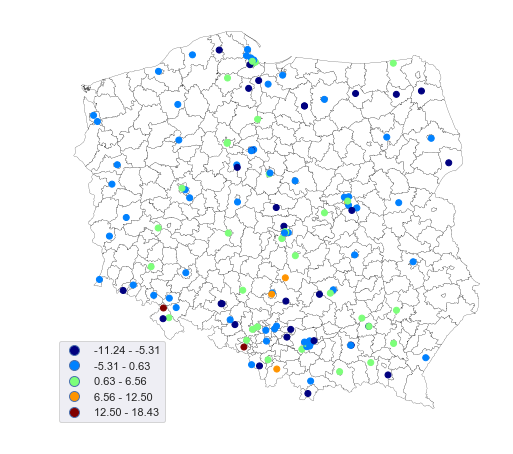

In [94]:
plt.rcParams['figure.figsize'] = [8,8]

ax = powiatypl.plot(color='white', edgecolor='black',linewidth=0.2);
pm10BB.plot(column='SR2017',cmap='jet', scheme='equal_interval',
                           ax=ax,legend='True');
ax.axis('off');

In [97]:
# Średnia roczna przewidywana dla stacji
pr_roczna2016=np.zeros((len(stacje_all),2))
#pr_roczna2017=np.zeros((len(stacje_all),2))
rok=int(2016)
for i in range(0,len(stacje_all)):
    smog1=smogp[(smogp.Code==stacje_all[i]) & (smogp.Year==rok)]
    if len(smog1)>200:   # co najmniej 200 dni
        pp=smogp['PRED'][(smogp.Code==stacje_all[i]) & (smogp.Year==rok)].mean()
        pps=smogp['PRED'][(smogp.Code==stacje_all[i]) & (smogp.Year==rok)].std()
        if rok==2016:
            pr_roczna2016[i,0]=round(pp,2)
            pr_roczna2016[i,1]=round(pps,2)
        elif rok==2017:
            pr_roczna2017[i,0]=round(pp,2)
            pr_roczna2017[i,1]=round(pps,2)   

In [98]:
out_plik = open(r"C:\POLUTION\PROJ\pr_roczne2.txt","w")

sss='STACJA,SR2016,SR2017,OD2016,OD2017'+"\n"
out_plik.write(sss)
for i in range (len(stacje_all)):
    #print(stacje_all[i],sr_roczna2016[i],sr_roczna2017[i])
    sss=stacje_all[i]+','+str(pr_roczna2016[i,0])+','+str(pr_roczna2017[i,0])+','\
    +str(pr_roczna2016[i,1])+','+str(pr_roczna2017[i,1])+'\n'
    out_plik.write(sss)
    
out_plik.close()   

In [99]:
pm10pr=pd.read_csv('pr_roczne2.txt')
pm10pr.loc[pm10pr['SR2017']==0,'SR2017']=np.nan
pm10pr.loc[pm10pr['SR2016']==0,'SR2016']=np.nan
pm10pr.loc[pm10pr['OD2017']==0,'OD2017']=np.nan
pm10pr.loc[pm10pr['OD2016']==0,'OD2016']=np.nan

In [100]:
pm10BP=pm10.set_index('AirQuali_1').join(pm10pr.set_index('STACJA'))
pm10BP.head(2)

,AirQuality,AirQuali_2,AirPolluta,Altitude,count,mean,STACJA_MET,IDPP,geometry,STACJA,SR2016,SR2017,OD2016,OD2017
AirQuali_1,,,,,,,,,,,,,,
PL0008A,SlKatoKossut,urban,PM10,273.0,20654.0,41.369689,Katowice,1,POINT (498220.7060315014 266381.2517729597),PL0008A,41.60,43.75,30.30,47.64
PL0012A,MpKrakAlKras,urban,PM10,207.0,20567.0,57.291317,KrakÃ³w,2,POINT (566277.409905806 243790.1838724455),PL0012A,47.57,45.48,30.34,43.28


**Śrenia roczna przewidywana w 2017**

C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\pysal\esda\mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\pysal\esda\mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


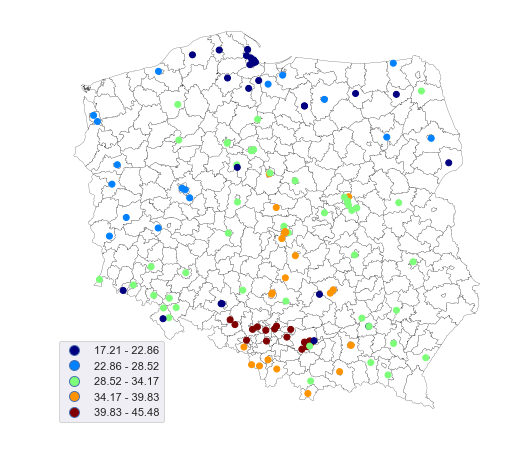

In [101]:
plt.rcParams['figure.figsize'] = [8,8]

ax = powiatypl.plot(color='white', edgecolor='black',linewidth=0.2);
pm10BP.plot(column='SR2017',cmap='jet', scheme='equal_interval',
                           ax=ax,legend='True');
ax.axis('off');

In [102]:
out_plik = open(r"C:\POLUTION\PROJ\dobowe_dni50prog.txt","w")

sss='STACJA,DNI17_50'+"\n"
out_plik.write(sss)
  

prog=50
rok=2017
for i in range(0,len(stacje_all)):
    smog1=smogp[(smogp.Code==stacje_all[i]) & (smogp.Year==rok)]
    #print(stacje_all[i],len(smog1['Concentration'][smog1['Concentration']>50]),len(smog1))
    if len(smog1)>=200:
        ldni=len(smog1['PRED'][smog1['PRED']>50])
        sss=stacje_all[i]+','+str(ldni)+'\n'
        out_plik.write(sss)
    
out_plik.close()    

In [103]:
pm10d50p=pd.read_csv('dobowe_dni50prog.txt')
pm10['STACJA']=pm10.AirQuali_1

pm10Cp=pd.merge(pm10,pm10d50p,how='outer',on='STACJA')

pm10Cp.head(3)

,AirQuality,AirQuali_1,AirQuali_2,AirPolluta,Altitude,count,mean,STACJA_MET,IDPP,geometry,STACJA,DNI17_50
0,SlKatoKossut,PL0008A,urban,PM10,273.0,20654.0,41.369689,Katowice,1,POINT (498220.7060315014 266381.2517729597),PL0008A,81.0
1,MpKrakAlKras,PL0012A,urban,PM10,207.0,20567.0,57.291317,KrakÃ³w,2,POINT (566277.409905806 243790.1838724455),PL0012A,94.0
2,WpKoniWyszyn,PL0031A,urban,PM10,103.0,18830.0,28.220928,Kalisz,3,POINT (450086.9278154476 484649.3748249114),PL0031A,36.0


**Liczba dni pow. 50 PM10 w 2017.**

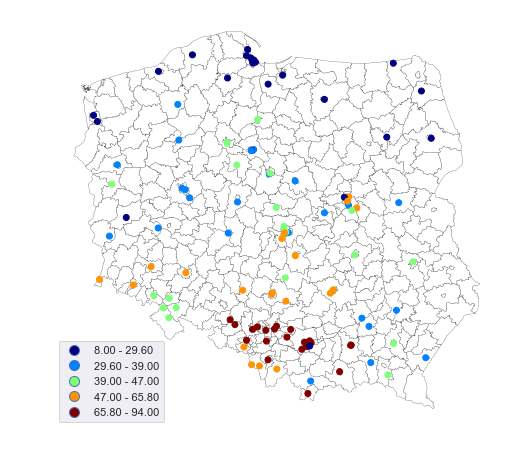

In [104]:
plt.rcParams['figure.figsize'] = [8,8]

ax = powiatypl.plot(color='white', edgecolor='black',linewidth=0.2);
pm10Cp[pm10Cp.DNI17_50>0].plot(column='DNI17_50',cmap='jet', scheme='quantiles',
                             ax=ax,legend='True');
ax.axis('off');